## Clustering

Clustering of unlabeled data can be performed with the module sklearn.cluster.

Each clustering algorithm comes in two variants: a class, that implements the fit method to learn the clusters on train data, and a function, that, given train data, returns an array of integer labels corresponding to the different clusters. For the class, the labels over the training data can be found in the labels_ attribute.

K-means Clustering:
--------------------

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean \mu_j of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from X, although they live in the same space. The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum of squared criterion:


In [67]:
## Copied from https://nbviewer.jupyter.org/url/bmobasher.com/Class/CSC478/Clustering.ipynb

Loading an example dataset
-----------------------------

scikit-learn comes with a few standard datasets, for instance the iris and digits datasets for classification and the boston house prices dataset for regression.

In [11]:
import numpy as np
import pylab as pl
import pandas as pd
from sklearn.cluster import KMeans 
from sklearn.datasets import load_boston

boston = load_boston()

In [12]:
np.set_printoptions(suppress=True, precision=2, linewidth=120)

In [13]:
print boston.data

[[   0.01   18.      2.31 ...,   15.3   396.9     4.98]
 [   0.03    0.      7.07 ...,   17.8   396.9     9.14]
 [   0.03    0.      7.07 ...,   17.8   392.83    4.03]
 ..., 
 [   0.06    0.     11.93 ...,   21.    396.9     5.64]
 [   0.11    0.     11.93 ...,   21.    393.45    6.48]
 [   0.05    0.     11.93 ...,   21.    396.9     7.88]]


In [20]:
print boston.keys()

['data', 'feature_names', 'DESCR', 'target']


In [41]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [21]:
print boston.target

[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2
  13.6  19.6  15.2  14.5  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9  20.   21.   24.7  30.8
  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6  14.4  19.4  19.7  20.5  25.   23.4  18.9  35.4  24.7  31.6  23.3  19.6
  18.7  16.   22.2  25.   33.   23.5  19.4  22.   17.4  20.9  24.2  21.7  22.8  23.4  24.1  21.4  20.   20.8  21.2  20.3
  28.   23.9  24.8  22.9  23.9  26.6  22.5  22.2  23.6  28.7  22.6  22.   22.9  25.   20.6  28.4  21.4  38.7  43.8  33.2
  27.5  26.5  18.6  19.3  20.1  19.5  19.5  20.4  19.8  19.4  21.7  22.8  18.8  18.7  18.5  18.3  21.2  19.2  20.4  19.3
  22.   20.3  20.5  17.3  18.8  21.4  15.7  16.2  18.   14.3  19.2  19.6  23.   18.4  15.6  18.1  17.4  17.1  13.3  17.8
  14.   14.4  13.4  15.6  11.8  13.8  15.6  14.6  17.8  15.4  21.5  19.6  15.3  19.4  17.   15.6  13.1  41.3  24.3  23.3
  27.   50.   50.   50.   22.7  

In [23]:
x = np.array([np.concatenate((boston.data[i],[boston.target[i]])) for i in range(len(boston.data))])
x

array([[   0.01,   18.  ,    2.31, ...,  396.9 ,    4.98,   24.  ],
       [   0.03,    0.  ,    7.07, ...,  396.9 ,    9.14,   21.6 ],
       [   0.03,    0.  ,    7.07, ...,  392.83,    4.03,   34.7 ],
       ..., 
       [   0.06,    0.  ,   11.93, ...,  396.9 ,    5.64,   23.9 ],
       [   0.11,    0.  ,   11.93, ...,  393.45,    6.48,   22.  ],
       [   0.05,    0.  ,   11.93, ...,  396.9 ,    7.88,   11.9 ]])

## Clustering: K-Means

* KMeans is an algorithm for unsupervised clustering: that is, finding clusters in data based on the data attributes alone (not the labels).

* KMeans is a relatively easy-to-understand algorithm. It searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.


In [25]:
## Now we use KMeans algorithm of scikit-learn to perform the clustering

In [30]:
kmeans = KMeans(n_clusters=5, max_iter=500, verbose=1) # initialization

In [31]:
kmeans.fit(x)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1815779.2553
start iteration
done sorting
end inner loop
Iteration 1, inertia 1744746.20966
start iteration
done sorting
end inner loop
Iteration 2, inertia 1631801.48035
start iteration
done sorting
end inner loop
Iteration 3, inertia 1584288.26916
start iteration
done sorting
end inner loop
Iteration 4, inertia 1579764.28342
start iteration
done sorting
end inner loop
Iteration 5, inertia 1579764.28342
center shift 0.000000e+00 within tolerance 2.738710e-01
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1525444.89566
start iteration
done sorting
end inner loop
Iteration 1, inertia 1501564.88453
start iteration
done sorting
end inner loop
Iteration 2, inertia 1500398.29876
start iteration
done sorting
end inner loop
Iteration 3, inertia 1500398.29876
center shift 0.000000e+00 within tolerance 2.738710e-01
Initialization complete
start iteration
done sortin

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [33]:
clusters = kmeans.predict(x)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3,
       3, 4, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0

In [37]:
## The centroids provide an aggregate representation and a characterization of each cluster.

In [40]:
print boston.feature_names
print kmeans.cluster_centers_

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']
[[   0.24   17.26    6.71    0.08    0.48    6.47   56.07    4.84    4.34  274.69   17.86  388.78    9.47   25.98]
 [  10.91    0.     18.57    0.08    0.67    5.98   89.91    2.08   23.02  668.21   20.2   371.8    17.87   17.43]
 [  16.06   -0.     18.1     0.      0.67    6.08   90.13    1.99   24.    666.     20.2    55.67   21.01   12.9 ]
 [   0.62   12.88   12.03    0.06    0.56    6.21   69.25    3.63    4.73  402.31   17.76  382.25   12.18   22.75]
 [   1.96    0.     16.71    0.09    0.71    5.92   91.82    2.32    4.73  386.91   17.    187.55   17.21   17.02]]


In [42]:
from sklearn.datasets import load_iris
iris = load_iris()

In [45]:
print iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']


In [53]:
data = iris.data
target = iris.target
print data

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [50]:
print iris.target

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [49]:
print list(set(target)) # build a list of unique elements

[0, 1, 2]


In [44]:
print iris.feature_names

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


This snippet uses the first and the third dimension (sepal length and sepal width) and the result is shown in the following figure.
Classes: 0 = Iris-Setosa, 1 = Iris-Versicolour, 2 = Iris-Virginica

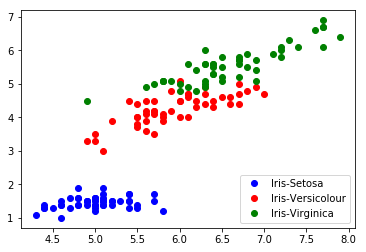

In [60]:
pl.plot(data[target==0,0],data[target==0,2],'bo')
pl.plot(data[target==1,0],data[target==1,2],'ro')
pl.plot(data[target==2,0],data[target==2,2],'go')
pl.legend(('Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'), loc=4)
pl.show()

In [61]:
iris_kmeans = KMeans(n_clusters=3, max_iter=500, verbose=1, n_init=5) # initialization
iris_kmeans.fit(data)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 94.2309921053
start iteration
done sorting
end inner loop
Iteration 1, inertia 86.1159314337
start iteration
done sorting
end inner loop
Iteration 2, inertia 84.4772597169
start iteration
done sorting
end inner loop
Iteration 3, inertia 83.6055095494
start iteration
done sorting
end inner loop
Iteration 4, inertia 82.3714144928
start iteration
done sorting
end inner loop
Iteration 5, inertia 81.3672
start iteration
done sorting
end inner loop
Iteration 6, inertia 80.3157462158
start iteration
done sorting
end inner loop
Iteration 7, inertia 79.6817219094
start iteration
done sorting
end inner loop
Iteration 8, inertia 79.1155666667
start iteration
done sorting
end inner loop
Iteration 9, inertia 78.945065826
start iteration
done sorting
end inner loop
Iteration 10, inertia 78.945065826
center shift 0.000000e+00 within tolerance 1.134707e-04
Initialization complete
start iteration
done sorting
end i

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=3, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [62]:
c = iris_kmeans.predict(data)
print c

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0 0 0 2 2 0 0 0 0 2
 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0 0 2]


Homogeneity: each cluster contains only members of a single class

Completeness: all members of a given class are assigned to the same cluster

In [63]:
from sklearn.metrics import completeness_score, homogeneity_score

In [65]:
print completeness_score(target,c)
print homogeneity_score(target,c)

0.764986151449
0.751485402199


In [66]:
print iris_kmeans.cluster_centers_

[[ 6.85  3.07  5.74  2.07]
 [ 5.01  3.42  1.46  0.24]
 [ 5.9   2.75  4.39  1.43]]


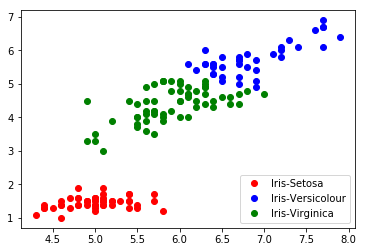

In [67]:
pl.plot(data[c==1,0],data[c==1,2],'ro')
pl.plot(data[c==0,0],data[c==0,2],'bo')
pl.plot(data[c==2,0],data[c==2,2],'go')
pl.legend(('Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'), loc=4)
pl.show()

In [66]:
## https://github.com/scikit-learn/scikit-learn/blob/master/examples/cluster/plot_cluster_iris.py

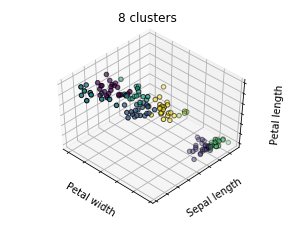

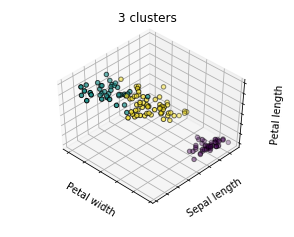

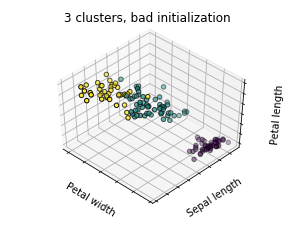

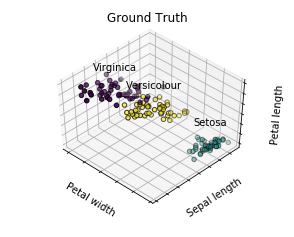

In [4]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

plt.show()

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()
print digits

{'images': array([[[  0.,   0.,   5., ...,   1.,   0.,   0.],
        [  0.,   0.,  13., ...,  15.,   5.,   0.],
        [  0.,   3.,  15., ...,  11.,   8.,   0.],
        ..., 
        [  0.,   4.,  11., ...,  12.,   7.,   0.],
        [  0.,   2.,  14., ...,  12.,   0.,   0.],
        [  0.,   0.,   6., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   5.,   0.,   0.],
        [  0.,   0.,   0., ...,   9.,   0.,   0.],
        [  0.,   0.,   3., ...,   6.,   0.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   0., ...,  10.,   0.,   0.]],

       [[  0.,   0.,   0., ...,  12.,   0.,   0.],
        [  0.,   0.,   3., ...,  14.,   0.,   0.],
        [  0.,   0.,   8., ...,  16.,   0.,   0.],
        ..., 
        [  0.,   9.,  16., ...,   0.,   0.,   0.],
        [  0.,   3.,  13., ...,  11.,   5.,   0.],
        [  0.,   0.,   0., ...,  16.,   9.,   0.]],

       ..., 
       [[ 

In [17]:
est = KMeans(n_clusters=10)
clusters = est.fit_predict(digits.data)
est.cluster_centers_.shape

(10L, 64L)

In [22]:
ig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

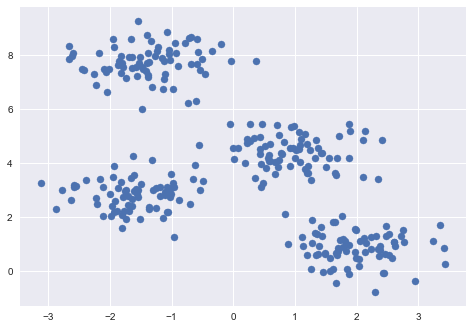

In [24]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

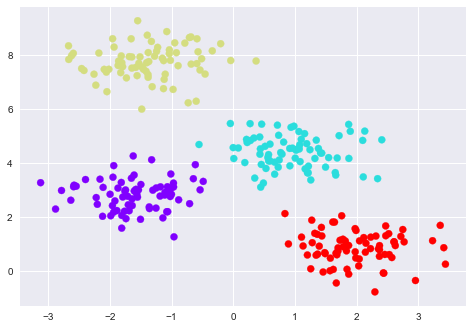

In [25]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow')

k-means assumptions
---------------------

This example is meant to illustrate situations where k-means will produce unintuitive and possibly unexpected clusters. In the first three plots, the input data does not conform to some implicit assumption that k-means makes and undesirable clusters are produced as a result. In the last plot, k-means returns intuitive clusters despite unevenly sized blobs.

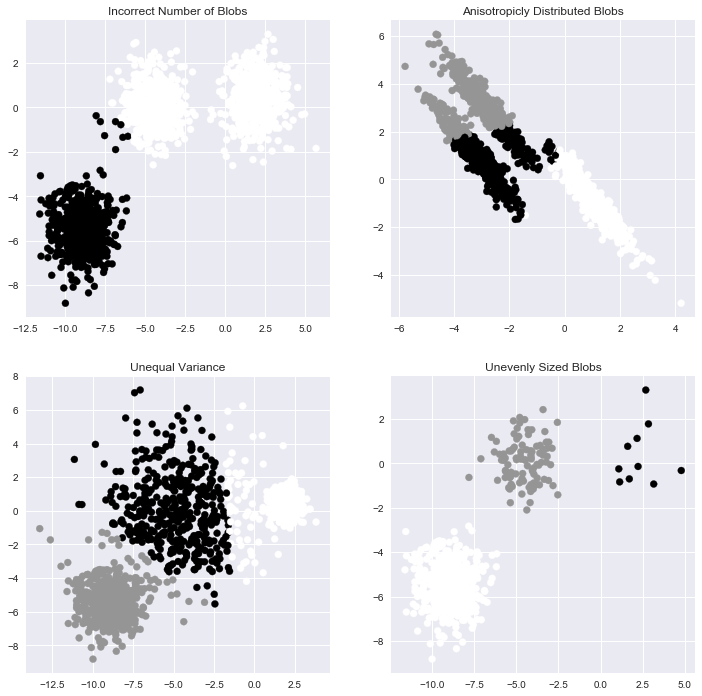

In [26]:
# Copied from https://github.com/scikit-learn/scikit-learn/blob/master/examples/cluster/plot_kmeans_assumptions.py
# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

DBSCAN clustering algorithm
-----------------------------

Finds core samples of high density and expands clusters from them

Estimated number of clusters: 3
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


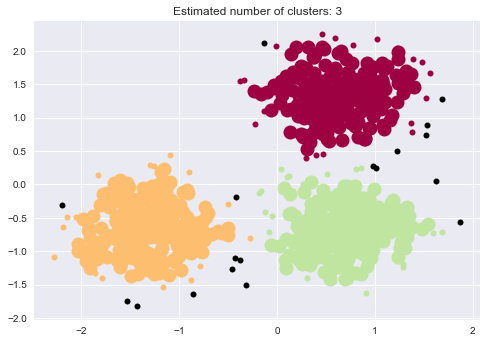

In [28]:
# Copied from https://github.com/scikit-learn/scikit-learn/blob/master/examples/cluster/plot_dbscan.py

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [65]:
## Copied from https://github.com/scikit-learn/scikit-learn/blob/master/examples/cluster/plot_cluster_comparison.py

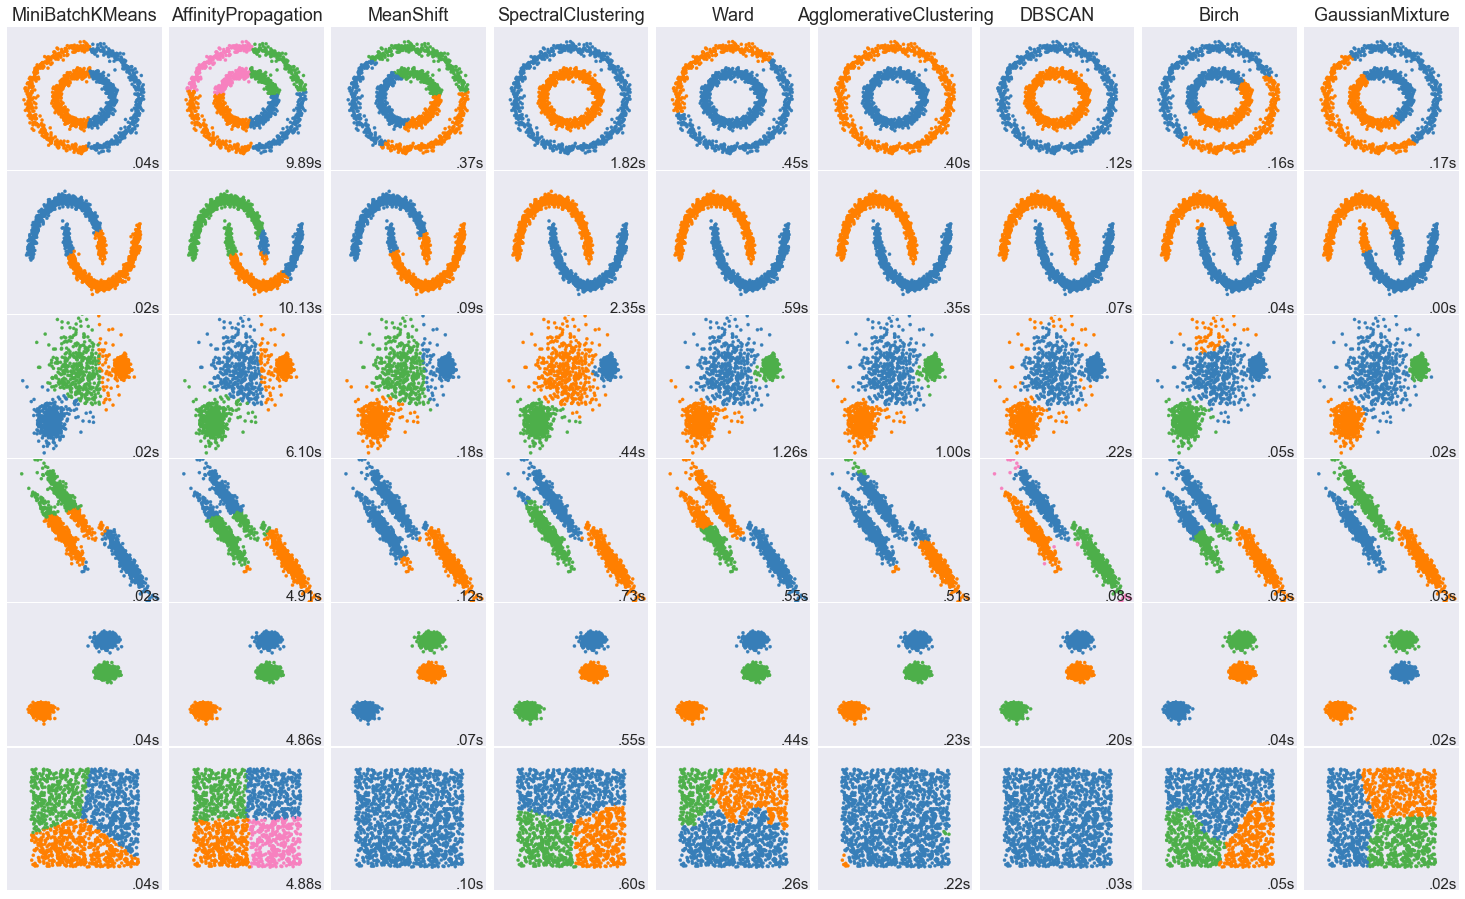

In [77]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2}),
    (aniso, {'eps': .15, 'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    
    ward = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage='ward', connectivity=connectivity)
    
    spectral = cluster.SpectralClustering(n_clusters=params['n_clusters'], eigen_solver='arpack', affinity="nearest_neighbors")
    
    dbscan = cluster.DBSCAN(eps=params['eps'])
    
    affinity_propagation = cluster.AffinityPropagation(damping=params['damping'], preference=params['preference'])
    
    average_linkage = cluster.AgglomerativeClustering(linkage="average", affinity="cityblock", n_clusters=params['n_clusters'], connectivity=connectivity)
    
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    
    gmm = mixture.GaussianMixture(n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

In [12]:
# Import the `pandas` library as `pd`
import pandas as pd

# Load in the data with `read_csv()`
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)

print(iris)

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
5    5.4  3.9  1.7  0.4     Iris-setosa
6    4.6  3.4  1.4  0.3     Iris-setosa
7    5.0  3.4  1.5  0.2     Iris-setosa
8    4.4  2.9  1.4  0.2     Iris-setosa
9    4.9  3.1  1.5  0.1     Iris-setosa
10   5.4  3.7  1.5  0.2     Iris-setosa
11   4.8  3.4  1.6  0.2     Iris-setosa
12   4.8  3.0  1.4  0.1     Iris-setosa
13   4.3  3.0  1.1  0.1     Iris-setosa
14   5.8  4.0  1.2  0.2     Iris-setosa
15   5.7  4.4  1.5  0.4     Iris-setosa
16   5.4  3.9  1.3  0.4     Iris-setosa
17   5.1  3.5  1.4  0.3     Iris-setosa
18   5.7  3.8  1.7  0.3     Iris-setosa
19   5.1  3.8  1.5  0.3     Iris-setosa
20   5.4  3.4  1.7  0.2     Iris-setosa
21   5.1  3.7  1.5  0.4     Iris-setosa
22   4.6  3.6  1.0  0.2     Iris-setosa
23   5.1  3.3  1.7  0.5     Iris-setosa


Application of KMeans to Digits
---------------------------------

For a closer-to-real-world example, let's again take a look at the digits data. Here we'll use KMeans to automatically cluster the data in 64 dimensions, and then look at the cluster centers to see what the algorithm has found.


In [69]:
from sklearn.datasets import load_digits
digits = load_digits()

In [70]:
est = KMeans(n_clusters=10)
clusters = est.fit_predict(digits.data)
est.cluster_centers_.shape

(10L, 64L)

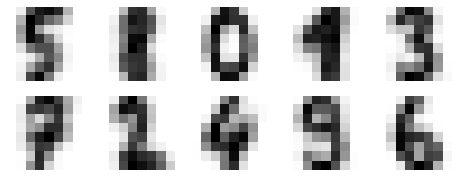

In [72]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

We see that even without the labels, KMeans is able to find clusters whose means are recognizable digits (with apologies to the number 8)!

The cluster labels are permuted; let's fix this:


In [73]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

For good measure, let's use our PCA visualization and look at the true cluster labels and K-means cluster labels:

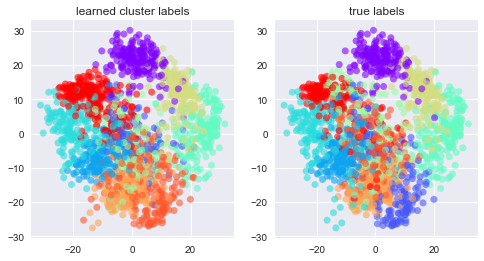

In [74]:
from sklearn.decomposition import PCA

X = PCA(2).fit_transform(digits.data)

kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X[:, 0], X[:, 1], c=labels, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(X[:, 0], X[:, 1], c=digits.target, **kwargs)
ax[1].set_title('true labels')

Just for kicks, let's see how accurate our K-Means classifier is with no label information:

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.79465776293823043

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 155   0   2   0   7   7  12]
 [  0   7   0   0 163   0   0   7   4   0]
 [  0   0   0   1   2 136   1   0   0  42]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   2   0   0   0   0   0 175   2   0]
 [  0   6   3   2   0   4   2   4 103  50]
 [  0  20   0   6   0   6   0   7   2 139]]


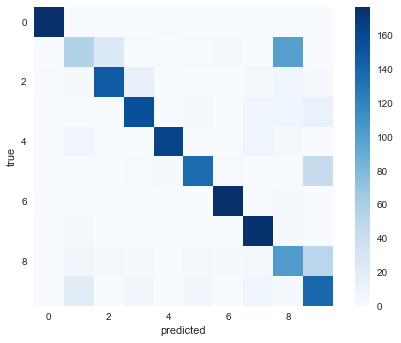

In [76]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(digits.target, labels))

plt.imshow(confusion_matrix(digits.target, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

Again, this is an 80% classification accuracy for an entirely unsupervised estimator which knew nothing about the labels

## References

* https://www.datacamp.com/community/tutorials/machine-learning-python

* http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

* https://nbviewer.jupyter.org/url/bmobasher.com/Class/CSC478/Clustering.ipynb

* http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html

* https://github.com/scikit-learn/scikit-learn/blob/master/examples/cluster/plot_cluster_iris.py

* https://github.com/scikit-learn/scikit-learn/blob/master/examples/cluster/plot_kmeans_assumptions.py

* https://github.com/scikit-learn/scikit-learn/blob/master/examples/cluster/plot_dbscan.py

* http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

* https://github.com/scikit-learn/scikit-learn/blob/master/examples/cluster/plot_cluster_comparison.py
